In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from hvec_support import sqlite as sq
import xarray as xr

In [2]:
def eq_nodal(lat):
    return 0.69 * 20 * (3 * (np.sin(np.radians(lat))) ** 2 - 1)

In [3]:
eq_nodal(52.4) * 1.2

14.625272627125035

In [4]:
eq_nodal(90)

27.599999999999998

In [5]:
# theoretical acceleration by Perigean cycle
T = 8.85 # in years
omega = 2 * np.pi / T
A = 5 # mm
a = A * omega ** 2
omega, a

(0.7099644414892188, 2.5202475408954914)

In [6]:
# theoretical acceleration by Nodal cycle
T = 18.61 # in years
omega = 2 * np.pi / T
A = 20 # mm
a = A * omega ** 2
omega, a

(0.33762414331969837, 2.2798012430472046)

In [7]:
0.5 * 4.8 * 100**2

24000.0

### Wind shear stress (6.2)

In [8]:
def CD(W10):
    return (1e-3) * (0.8 + 0.065 * W10)

In [9]:
rho_a = 1.29

def tau_wind(W10):
    return rho_a * CD(W10) * W10**2

In [10]:
W10 = np.linspace(0, 30, 1000)

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_9664\1688970581.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(W10, tau_wind(W10) / (rho_a * 0.8e-3 * W10**2))


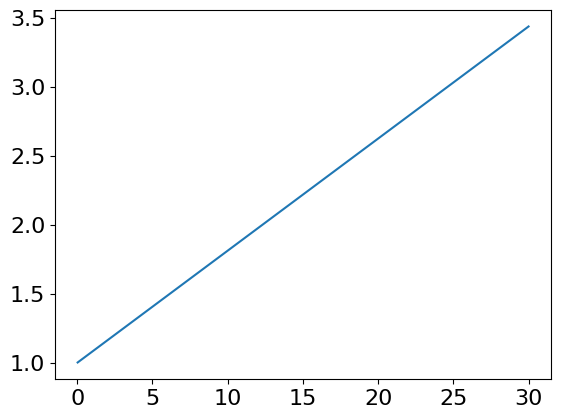

In [11]:
plt.plot(W10, tau_wind(W10) / (rho_a * 0.8e-3 * W10**2))

In [12]:
help(sq)

Help on module hvec_support.sqlite in hvec_support:

NAME
    hvec_support.sqlite - Module containing functions supporting the use of sqlite

FUNCTIONS
    connect_verbose(conn_str, *args, **kwargs)
        Convenience method. Connect existing database and show available tables.
        Verbose version of sq.connect
        
        Args:
            conn_str, string: connection string (file name with path)
        
        Returns:
            cnxn, connection object: database connector
    
    datetime_range(start, end, delta)
        H.G. Voortman; 15-5-2020
        
        Taken from 
        https://stackoverflow.com/questions/10688006/generate-a-list-of-datetimes-between-an-interval
        Modified to exporting an array of datetime
    
    db_to_csv(cnxn, **kwargs)
        Copy all tables in a database to csv
        
        Args:
            cnxn: database connection
    
    getColumnList(cnxn, table)
        Get list of columns in a specified table
    
    getTableList(c

In [13]:
path = os.getenv('DATAPATH')